In [1]:
#!pip install pygam

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
import missingno as msngo

from pygam import LinearGAM, s

import lec2_graphs as afx

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, median_absolute_error

warnings.filterwarnings ('ignore')

plt.rcParams ['figure.figsize'] = (14,8)
plt.style.use ('seaborn')

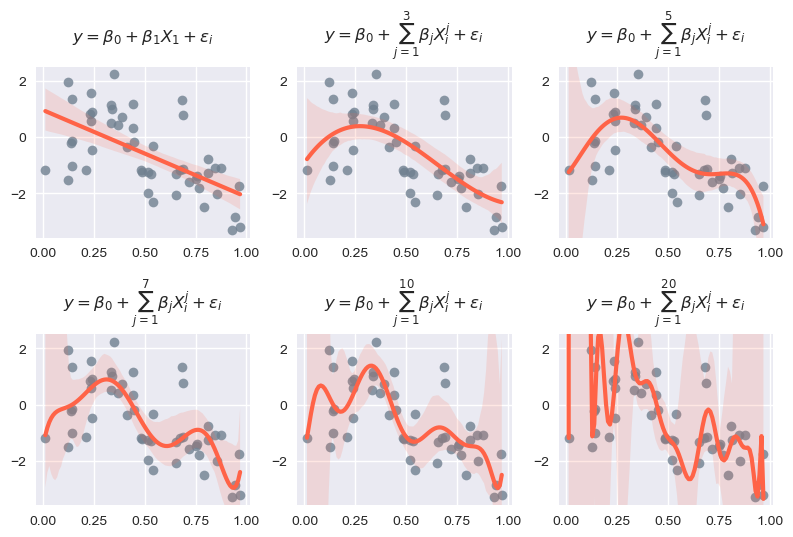

In [3]:
afx.polynomial_degrees()

In [4]:
df = pd.read_csv('kc_house_data.csv')

In [5]:
df.drop(['zipcode','id', 'date'], axis = 1, inplace=True)


In [6]:
sub = df[['bedrooms','bathrooms','sqft_living','sqft_lot']]
X_train_pre, X_test_pre, y_train, y_test = train_test_split(sub, df['price'], test_size=.3, random_state=63)

# ajustamos el estandarizador sobre el conjunto de entrenamiento (para que aprenda la media y desv. est.)
scaler = StandardScaler().fit(X_train_pre)




In [7]:
# con el estandarizador ajustamos sobre entrenamiento, transformamos el conjunto de entrenamiento con esta estandarizacion
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns= X_train_pre.columns)

# transformamos el conjunto de pruebas con el estandarizador ajustado sobre entrenamiento
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns= X_test_pre.columns)

In [8]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287


In [9]:
sub

,bedrooms,bathrooms,sqft_living,sqft_lot
0,3,1.00,1180,5650
1,3,2.25,2570,7242
2,2,1.00,770,10000
3,4,3.00,1960,5000
4,3,2.00,1680,8080
...,...,...,...,...
21608,3,2.50,1530,1131
21609,4,2.50,2310,5813
21610,2,0.75,1020,1350
21611,3,2.50,1600,2388


In [10]:
lams = np.logspace(-3,3,3)

In [11]:
type(lams)

numpy.ndarray

In [12]:
lams = [lams]*len(X_train.columns)

In [13]:
lams

[array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03])]

In [14]:
type(lams)

list

In [15]:
gam = LinearGAM(s(0) + s(1) + s(2) + s(3), fit_intercept=True)

In [16]:
gam.gridsearch(X_train.values, y_train.values, lam = lams)

  0% (0 of 81) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (1 of 81) |                         | Elapsed Time: 0:00:00 ETA:   0:00:38
  2% (2 of 81) |                         | Elapsed Time: 0:00:00 ETA:   0:00:33
  3% (3 of 81) |                         | Elapsed Time: 0:00:01 ETA:   0:00:29
  4% (4 of 81) |#                        | Elapsed Time: 0:00:01 ETA:   0:00:28
  6% (5 of 81) |#                        | Elapsed Time: 0:00:01 ETA:   0:00:26
  7% (6 of 81) |#                        | Elapsed Time: 0:00:02 ETA:   0:00:27
  8% (7 of 81) |##                       | Elapsed Time: 0:00:02 ETA:   0:00:25
  9% (8 of 81) |##                       | Elapsed Time: 0:00:02 ETA:   0:00:24
 11% (9 of 81) |##                       | Elapsed Time: 0:00:03 ETA:   0:00:24
 12% (10 of 81) |##                      | Elapsed Time: 0:00:03 ETA:   0:00:23
 13% (11 of 81) |###                     | Elapsed Time: 0:00:03 ETA:   0:00:23
 14% (12 of 81) |###                    

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

In [18]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], dtype='object')

In [20]:
gam.statistics_.keys()

dict_keys(['n_samples', 'm_features', 'edof_per_coef', 'edof', 'scale', 'cov', 'se', 'AIC', 'AICc', 'pseudo_r2', 'GCV', 'UBRE', 'loglikelihood', 'deviance', 'p_values'])

In [21]:
gam.lam

[[1000.0], [0.001], [0.001], [0.001]]

In [22]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     50.5084
Link Function:                     IdentityLink Log Likelihood:                               -388710.4607
Number of Samples:                        15129 AIC:                                           777523.9383
                                                AICc:                                           777524.297
                                                GCV:                                      57794407073.9769
                                                Scale:                                    57447204678.7826
                                                Pseudo R-Squared:                                   0.5944
Feature Function                  Lam

# Metodo de dependencias parcial

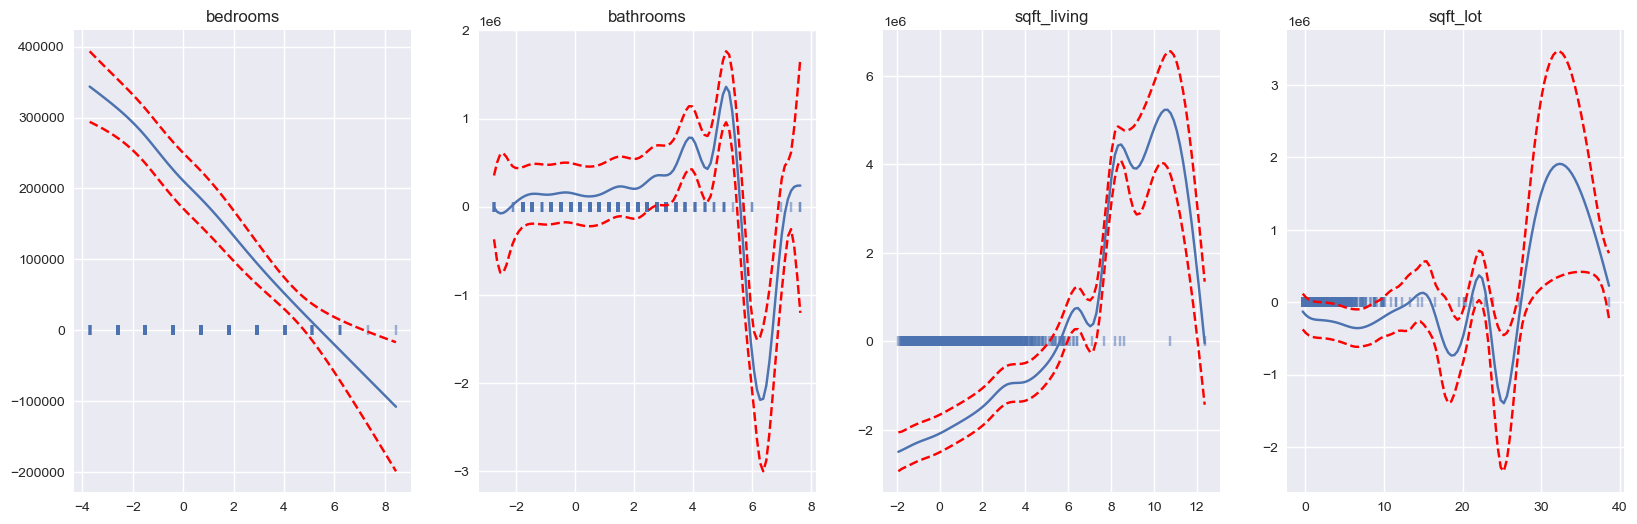

In [26]:



fig, axs = plt.subplots(1,4, figsize = (20,6));

titles = X_train.columns

for i, ax in enumerate(axs.flatten()):
    XX = gam.generate_X_grid(term=i)
    ax.plot(XX[:,i], gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:,i], gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.scatter(X_train[titles[i]],
               [0] * len(X_train[titles[i]]),
               marker = '|', alpha = .5)
    ax.set_title(titles[i]);

# Modificación de hiperparametros en GAM

In [27]:
new_gam = LinearGAM(lam = 1e6).fit(X_train, y_train)

In [28]:
def report_metrics(model, x_test, y_test):
    preds = model.predict(x_test)
    print(f'Test R2: {r2_score(y_test, preds)}')
    print(f'Test MSE: {mean_squared_error(y_test,preds)}')
    print(f'Test Median Absolute Error: {median_absolute_error(y_test, preds)}')

In [29]:
print(f'Metricas para el primer modelo entregado con lambda: {gam.lam}\n')
report_metrics(gam,X_test, y_test)

Metricas para el primer modelo entregado con lambda: [[1000.0], [0.001], [0.001], [0.001]]

Test R2: 0.5044430772020212
Test MSE: 59381987543.50871
Test Median Absolute Error: 120633.49269070919


In [30]:
print(f'Metricas para el primer modelo entregado con lambda: {gam.lam}\n')
report_metrics(new_gam,X_test, y_test)

Metricas para el primer modelo entregado con lambda: [[1000.0], [0.001], [0.001], [0.001]]

Test R2: 0.48205833013172383
Test MSE: 62064324749.47058
Test Median Absolute Error: 125551.63675600488


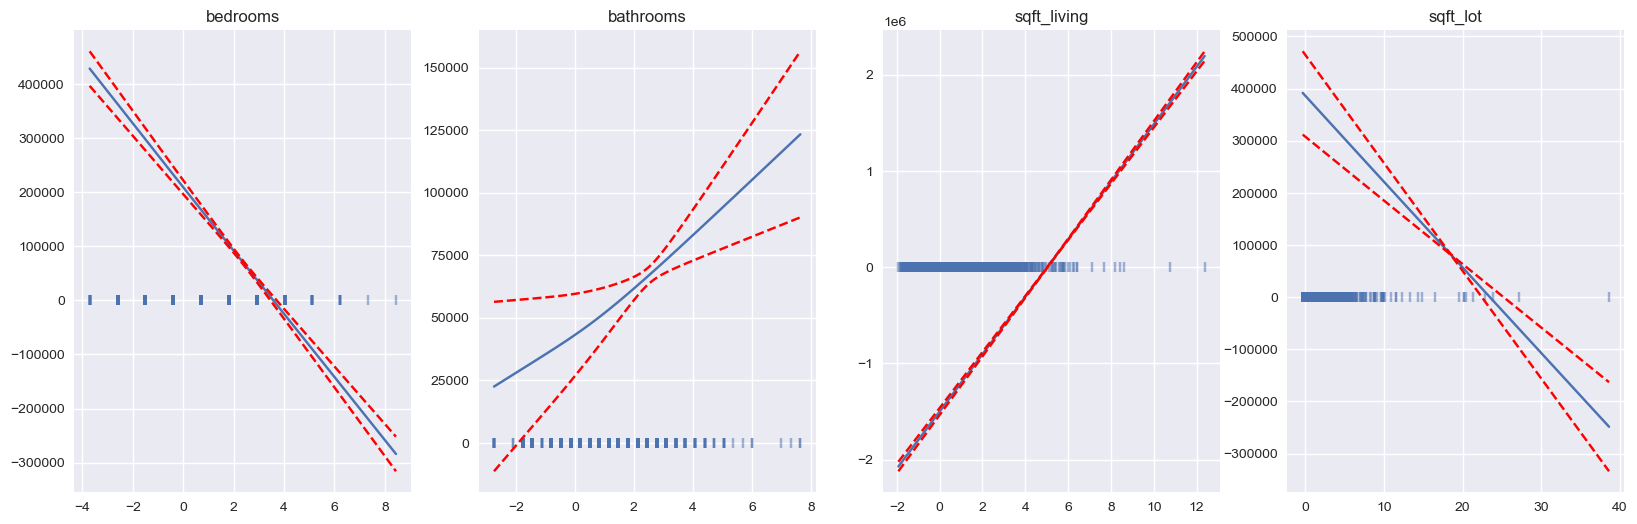

In [31]:
fig, axs = plt.subplots(1,4, figsize = (20,6));

titles = X_train.columns

for i, ax in enumerate(axs.flatten()):
    XX = new_gam.generate_X_grid(term=i)
    ax.plot(XX[:,i], new_gam.partial_dependence(term=i, X=XX))
    ax.plot(XX[:,i], new_gam.partial_dependence(term=i, X=XX, width=.95)[1], c='r', ls='--')
    ax.scatter(X_train[titles[i]],
               [0] * len(X_train[titles[i]]),
               marker = '|', alpha = .5)
    ax.set_title(titles[i]);